# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
for city in cities:
    print(city)

tromso
yumen
hilo
butaritari
albany
lalsot
doha
cape town
tecoanapa
trairi
bambanglipuro
saskylakh
sentyabrskiy
jamestown
ushuaia
vaini
san quintin
berdigestyakh
kavieng
molina
mill valley
taolanaro
campo maior
kismayo
castro
inuvik
mount isa
hobart
luderitz
salinas
yellowknife
kapaa
nikolskoye
punta arenas
riyadh
hermanus
mataura
richards bay
chuy
mnogovershinnyy
ilulissat
east london
washington
indian head
laguna
tasiilaq
thompson
port moresby
belushya guba
puerto ayora
pacific grove
busselton
cidreira
nizhneyansk
qaanaaq
khatanga
bud
saint george
chokurdakh
manzanillo
takhli
sioux lookout
barentsburg
nuuk
kruisfontein
atuona
lompoc
barrow
sosnovskiy
solnechnyy
perth
torbay
ahuimanu
touho
kemijarvi
sabang
coihaique
airai
tuktoyaktuk
upernavik
pevek
nipawin
mys shmidta
cherskiy
rikitea
merida
grand gaube
sturgis
camana
vostok
antofagasta
dickinson
port hardy
ambon
namibe
maturin
we
lata
astara
avarua
punta alta
kodiak
vila
attawapiskat
saint-augustin
mudyuga
victoria
saint-pierre
bluf

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#query_url = f"{url}appid={api_key}&q="
query_url = f"{url}appid={api_key}&units={units}&q="

In [6]:
weather_responses = [];
for city in cities:
    weather_data = requests.get(query_url + city).json()
    weather_responses.append(weather_data)
    pprint(weather_data)

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 69.65, 'lon': 18.96},
 'dt': 1540664400,
 'id': 3133895,
 'main': {'humidity': 86,
          'pressure': 1022,
          'temp': 30.2,
          'temp_max': 30.2,
          'temp_min': 30.2},
 'name': 'Tromso',
 'sys': {'country': 'NO',
         'id': 5339,
         'message': 0.0032,
         'sunrise': 1540623015,
         'sunset': 1540649052,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'speed': 2.24}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 40.29, 'lon': 97.04},
 'dt': 1540665811,
 'id': 1528998,
 'main': {'grnd_level': 859.13,
          'humidity': 59,
          'pressure': 859.13,
          'sea_level': 1046.61,
          'temp': 30.04,
          'temp_max': 30.04,
          'temp_min': 30.04},
 'name': 'Yumen',
 'sys': {'count

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 15.34, 'lon': 74.49},
 'dt': 1540665555,
 'id': 1273574,
 'main': {'grnd_level': 962.24,
          'humidity': 44,
          'pressure': 962.24,
          'sea_level': 1027.07,
          'temp': 71.26,
          'temp_max': 71.26,
          'temp_min': 71.26},
 'name': 'Vaini',
 'sys': {'country': 'IN',
         'message': 0.0042,
         'sunrise': 1540601806,
         'sunset': 1540643681},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 71.0012, 'speed': 4.5}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 17.54, 'lon': 120.52},
 'dt': 1540663200,
 'id': 1688687,
 'main': {'humidity': 69,
          'pressure': 1012,
          'temp': 77,
          'temp_max': 77,
          'temp_min': 77},
 'name': 'San Quintin',
 'sys': {'country': 'PH',
         'id': 7705,
         'message': 0.00

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 22.08, 'lon': -159.32},
 'dt': 1540662960,
 'id': 5848280,
 'main': {'humidity': 78,
          'pressure': 1017,
          'temp': 78.8,
          'temp_max': 78.8,
          'temp_min': 78.8},
 'name': 'Kapaa',
 'sys': {'country': 'US',
         'id': 833,
         'message': 0.0032,
         'sunrise': 1540658348,
         'sunset': 1540699357,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 12.75}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 59.7, 'lon': 30.79},
 'dt': 1540663200,
 'id': 546105,
 'main': {'humidity': 95,
          'pressure': 1002,
          'temp': 33.8,
          'temp_max': 33.8,
          'temp_min': 33.8},
 'name': 'Nikolskoye',
 'sys': {'country': 'RU',
         'id': 7267,
         'message': 0.00

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 27.52, 'lon': -110.01},
 'dt': 1540662000,
 'id': 4013704,
 'main': {'humidity': 37,
          'pressure': 1013,
          'temp': 86,
          'temp_max': 86,
          'temp_min': 86},
 'name': 'Laguna',
 'sys': {'country': 'MX',
         'id': 3975,
         'message': 0.006,
         'sunrise': 1540646871,
         'sunset': 1540687162,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 71.0012, 'speed': 2.37}}
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 65.61, 'lon': -37.64},
 'dt': 1540662600,
 'id': 3424607,
 'main': {'humidity': 95,
          'pressure': 1009,
          'temp': 32,
          'temp_max': 32,
          'temp_min': 32},
 'name': 'Tasiilaq',
 'sys': {'country': 'GL',
         'id': 4806,
         'message': 0.0053,
        

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 20.34, 'lon': -77.12},
 'dt': 1540665821,
 'id': 3547867,
 'main': {'grnd_level': 1026.03,
          'humidity': 98,
          'pressure': 1026.03,
          'sea_level': 1026.75,
          'temp': 84.49,
          'temp_max': 84.49,
          'temp_min': 84.49},
 'name': 'Manzanillo',
 'sys': {'country': 'CU',
         'message': 0.0044,
         'sunrise': 1540638503,
         'sunset': 1540679749},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 268.001, 'speed': 4.61}}
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 15.26, 'lon': 100.34},
 'dt': 1540665821,
 'id': 1605912,
 'main': {'grnd_level': 1024.57,
          'humidity': 99,
          'pressure': 1024.57,
          'sea_level': 1026.42,
          'temp': 73.01,
          'temp_max': 73.01,
          'temp_min': 73.01},
 'name': 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 13.72, 'lon': 123.58},
 'dt': 1540665824,
 'id': 1691355,
 'main': {'grnd_level': 1012.01,
          'humidity': 89,
          'pressure': 1012.01,
          'sea_level': 1021.88,
          'temp': 80.08,
          'temp_max': 80.08,
          'temp_min': 80.08},
 'name': 'Sabang',
 'sys': {'country': 'PH',
         'message': 0.003,
         'sunrise': 1540589928,
         'sunset': 1540631998},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 356.501, 'speed': 14.67}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -45.58, 'lon': -72.07},
 'dt': 1540663200,
 'id': 3894426,
 'main': {'humidity': 42,
          'pressure': 1012,
          'temp': 61.59,
          'temp_max': 62.6,
          'temp_min': 60.8},
 'name': 'Coihaique',
 'sys': {'country': 'CL',
         'id': 4643,
     

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -23.65, 'lon': -70.4},
 'dt': 1540663200,
 'id': 3899539,
 'main': {'humidity': 59,
          'pressure': 1014,
          'temp': 64.4,
          'temp_max': 64.4,
          'temp_min': 64.4},
 'name': 'Antofagasta',
 'sys': {'country': 'CL',
         'id': 4647,
         'message': 0.0042,
         'sunrise': 1540634294,
         'sunset': 1540680768,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 200, 'speed': 11.41}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 46.88, 'lon': -102.79},
 'dt': 1540662960,
 'id': 5688789,
 'main': {'humidity': 62,
          'pressure': 1007,
          'temp': 55.4,
          'temp_max': 55.4,
          'temp_min': 55.4},
 'name': 'Dickinson',
 'sys': {'country': 'US',
         'id': 1856,
         'm

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 5.28, 'lon': 115.24},
 'dt': 1540665000,
 'id': 1733782,
 'main': {'humidity': 94,
          'pressure': 1010,
          'temp': 78.8,
          'temp_max': 78.8,
          'temp_min': 78.8},
 'name': 'Victoria',
 'sys': {'country': 'BN',
         'id': 8115,
         'message': 0.0035,
         'sunrise': 1540591457,
         'sunset': 1540634479,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 99.0012, 'speed': 2.48}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 48.95, 'lon': 4.24},
 'dt': 1540665000,
 'id': 2995603,
 'main': {'humidity': 86,
          'pressure': 1009,
          'temp': 41,
          'temp_max': 41,
          'temp_min': 41},
 'name': 'Saint-Pierre',
 'sys': {'country': 'FR',
         'id': 5604,
         'message': 0

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 60.79, 'lon': -161.76},
 'dt': 1540662780,
 'id': 5880568,
 'main': {'humidity': 86,
          'pressure': 1010,
          'temp': 28.4,
          'temp_max': 28.4,
          'temp_min': 28.4},
 'name': 'Bethel',
 'sys': {'country': 'US',
         'id': 28,
         'message': 0.0041,
         'sunrise': 1540663340,
         'sunset': 1540695491,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 14.99}}
{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 19.89, 'lon': 102.14},
 'dt': 1540665832,
 'id': 1655559,
 'main': {'grnd_level': 948.94,
          'humidity': 97,
          'pressure': 948.94,
          'sea_level': 1029.3,
          'temp': 68.38,
          'temp_max': 68.38,
          'temp_min': 68.38},
 'name': 'Luang Prabang',

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 5.38, 'lon': -52.96},
 'dt': 1540665834,
 'id': 3380290,
 'main': {'grnd_level': 1022.3,
          'humidity': 91,
          'pressure': 1022.3,
          'sea_level': 1023.67,
          'temp': 83.27,
          'temp_max': 83.27,
          'temp_min': 83.27},
 'name': 'Sinnamary',
 'sys': {'country': 'GF',
         'message': 0.0038,
         'sunrise': 1540631831,
         'sunset': 1540674836},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 71.5012, 'speed': 6.62}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 20.89, 'lon': -156.47},
 'dt': 1540662960,
 'id': 5847411,
 'main': {'humidity': 69,
          'pressure': 1015,
          'temp': 76.59,
          'temp_max': 80.6,
          'temp_min': 73.4},
 'name': 'Kahului',
 'sys': {'country': 'US',
         'id': 823,
         'mes

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 71, 'lon': 24.66},
 'dt': 1540664400,
 'id': 779622,
 'main': {'humidity': 86,
          'pressure': 1020,
          'temp': 30.2,
          'temp_max': 30.2,
          'temp_min': 30.2},
 'name': 'Havoysund',
 'sys': {'country': 'NO',
         'id': 5296,
         'message': 0.0041,
         'sunrise': 1540622427,
         'sunset': 1540646899,
         'type': 1},
 'visibility': 600,
 'weather': [{'description': 'snow', 'icon': '13n', 'id': 601, 'main': 'Snow'}],
 'wind': {'deg': 340, 'speed': 12.75}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 20.71, 'lon': -105.21},
 'dt': 1540662660,
 'id': 4004293,
 'main': {'humidity': 70,
          'pressure': 1013,
          'temp': 84.2,
          'temp_max': 84.2,
          'temp_min': 84.2},
 'name': 'Ixtapa',
 'sys': {'country': 'MX',
         'id': 4011,
         'message': 0.003,
         'sunrise': 1540645270,
         'sunset': 1

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 42.43, 'lon': 130.64},
 'dt': 1540665839,
 'id': 2039557,
 'main': {'grnd_level': 1010.87,
          'humidity': 100,
          'pressure': 1010.87,
          'sea_level': 1019.41,
          'temp': 39.85,
          'temp_max': 39.85,
          'temp_min': 39.85},
 'name': 'Khasan',
 'sys': {'country': 'RU',
         'message': 0.003,
         'sunrise': 1540590296,
         'sunset': 1540628217},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 270.501, 'speed': 10.87}}
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -2.67, 'lon': 141.3},
 'dt': 1540665611,
 'id': 2084442,
 'main': {'grnd_level': 1020.52,
          'humidity': 100,
          'pressure': 1020.52,
          'sea_level': 1020.75,
          'temp': 82.46,
          'temp_max': 82.46,
          'temp_min': 82.46},
 'n

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 25.87, 'lon': -97.51},
 'dt': 1540662780,
 'id': 3523466,
 'main': {'humidity': 54,
          'pressure': 1019,
          'temp': 81.03,
          'temp_max': 82.4,
          'temp_min': 80.6},
 'name': 'Matamoros',
 'sys': {'country': 'US',
         'id': 2570,
         'message': 0.0033,
         'sunrise': 1540643757,
         'sunset': 1540684278,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 80, 'speed': 5.82}}
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -0.6, 'lon': 73.08},
 'dt': 1540665842,
 'id': 1282256,
 'main': {'grnd_level': 1026.59,
          'humidity': 100,
          'pressure': 1026.59,
          'sea_level': 1026.62,
          'temp': 79.76,
          'temp_max': 79.76,
          'temp_min': 79.76},
 'name': 'Hithadhoo'

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 38.52, 'lon': -28.7},
 'dt': 1540665000,
 'id': 3372707,
 'main': {'humidity': 63,
          'pressure': 1032,
          'temp': 66.2,
          'temp_max': 66.2,
          'temp_min': 66.2},
 'name': 'Ribeira Grande',
 'sys': {'country': 'PT',
         'id': 5950,
         'message': 0.0181,
         'sunrise': 1540628203,
         'sunset': 1540666793,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 60, 'speed': 19.46}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -33.44, 'lon': -70.65},
 'dt': 1540663200,
 'id': 3871336,
 'main': {'humidity': 29,
          'pressure': 1016,
          'temp': 77.02,
          'temp_max': 78.8,
          'temp_min': 75.2},
 'name': 'Santiago',
 'sys': {'country': 'CL',
         'id': 4670,
         'messag

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.53, 'lon': 20.04},
 'dt': 1540663200,
 'id': 1015776,
 'main': {'humidity': 82,
          'pressure': 1018,
          'temp': 68,
          'temp_max': 68,
          'temp_min': 68},
 'name': 'Bredasdorp',
 'sys': {'country': 'ZA',
         'id': 6591,
         'message': 0.0315,
         'sunrise': 1540611771,
         'sunset': 1540659895,
         'type': 1},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 130, 'speed': 10.29}}
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -3.4, 'lon': -78.58},
 'dt': 1540665847,
 'id': 3657661,
 'main': {'grnd_level': 873.31,
          'humidity': 82,
          'pressure': 873.31,
          'sea_level': 1023.1,
          'temp': 71.3,
          'temp_max': 71.3,
          'temp_min': 71.3},
 'name': 'Gualaquiza',
 'rain': {'3h': 0.325},
 'sys': 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -18.59, 'lon': -39.73},
 'dt': 1540665849,
 'id': 3465769,
 'main': {'grnd_level': 1018.49,
          'humidity': 81,
          'pressure': 1018.49,
          'sea_level': 1019.09,
          'temp': 83.45,
          'temp_max': 83.45,
          'temp_min': 83.45},
 'name': 'Conceicao da Barra',
 'sys': {'country': 'BR',
         'message': 0.0128,
         'sunrise': 1540627270,
         'sunset': 1540673066},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 29.5012, 'speed': 18.7}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 39.31, 'lon': -74.98},
 'dt': 1540664460,
 'id': 4501427,
 'main': {'humidity': 100,
          'pressure': 996,
          'temp': 55,
          'temp_max': 60.8,
          'temp_min': 51.8},
 'name': 'Port Elizabeth',
 'sys': {'country': 'US',
         'id': 1983,

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 58.81, 'lon': -122.69},
 'dt': 1540663200,
 'id': 5955902,
 'main': {'humidity': 60,
          'pressure': 1009,
          'temp': 41,
          'temp_max': 41,
          'temp_min': 41},
 'name': 'Fort Nelson',
 'sys': {'country': 'CA',
         'id': 3278,
         'message': 0.0042,
         'sunrise': 1540653498,
         'sunset': 1540686584,
         'type': 1},
 'visibility': 48279,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 6.93}}
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 70.86, 'lon': 29.09},
 'dt': 1540665852,
 'id': 780687,
 'main': {'grnd_level': 1011.36,
          'humidity': 100,
          'pressure': 1011.36,
          'sea_level': 1030.31,
          'temp': 32.56,
          'temp_max': 32.56,
          'temp_min': 32.56},
 'name': 'Berlevag',

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 60.47, 'lon': 166.1},
 'dt': 1540665854,
 'id': 2120591,
 'main': {'grnd_level': 1013.87,
          'humidity': 92,
          'pressure': 1013.87,
          'sea_level': 1033.64,
          'temp': 35.44,
          'temp_max': 35.44,
          'temp_min': 35.44},
 'name': 'Tilichiki',
 'sys': {'country': 'RU',
         'message': 0.0038,
         'sunrise': 1540584435,
         'sunset': 1540617033},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 189.501, 'speed': 3.94}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -46.43, 'lon': -67.52},
 'dt': 1540665854,
 'id': 3863379,
 'main': {'grnd_level': 999.44,
          'humidity': 40,
          'pressure': 999.44,
          'sea_level': 1020.5,
          'temp': 69.73,
          'temp_max': 69.73,
          'temp_min': 69.73},
 'name

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -29.95, 'lon': -71.34},
 'dt': 1540663200,
 'id': 3893629,
 'main': {'humidity': 63,
          'pressure': 1014,
          'temp': 64.4,
          'temp_max': 64.4,
          'temp_min': 64.4},
 'name': 'Coquimbo',
 'sys': {'country': 'CL',
         'id': 4666,
         'message': 0.0079,
         'sunrise': 1540634061,
         'sunset': 1540681459,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 290, 'speed': 18.34}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 12.03, 'lon': 8.66},
 'dt': 1540663200,
 'id': 2335204,
 'main': {'humidity': 65,
          'pressure': 1014,
          'temp': 82.4,
          'temp_max': 82.4,
          'temp_min': 82.4},
 'name': 'Kubuta',
 'sys': {'country': 'NG',
     

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 36.2, 'lon': 46.09},
 'dt': 1540665860,
 'id': 117392,
 'main': {'grnd_level': 833.27,
          'humidity': 79,
          'pressure': 833.27,
          'sea_level': 1037.85,
          'temp': 36.79,
          'temp_max': 36.79,
          'temp_min': 36.79},
 'name': 'Mitu',
 'sys': {'country': 'IR',
         'message': 0.0044,
         'sunrise': 1540610042,
         'sunset': 1540649059},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 7.50122, 'speed': 3.38}}
{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -31.97, 'lon': 141.45},
 'dt': 1540665591,
 'id': 2173911,
 'main': {'grnd_level': 998.07,
          'humidity': 56,
          'pressure': 998.07,
          'sea_level': 1029.87,
          'temp': 62.21,
          'temp_max': 62.21,
          'temp_min': 62.21},
 'name': 'Broke

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 37.14, 'lon': -8.45},
 'dt': 1540665000,
 'id': 2267254,
 'main': {'humidity': 38,
          'pressure': 1009,
          'temp': 60.8,
          'temp_max': 60.8,
          'temp_min': 60.8},
 'name': 'Lagoa',
 'sys': {'country': 'PT',
         'id': 5948,
         'message': 0.0034,
         'sunrise': 1540623220,
         'sunset': 1540662059,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 320, 'gust': 13.9, 'speed': 19.46}}
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 6.21, 'lon': 10.69},
 'dt': 1540665863,
 'id': 2229748,
 'main': {'grnd_level': 890.58,
          'humidity': 90,
          'pressure': 890.58,
          'sea_level': 1022,
          'temp': 68.2,
          'temp_max': 68.2,
          'temp_min': 68.2},
 'name': 'Kumbo',
 'sys

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -37.72, 'lon': -72.23},
 'dt': 1540663200,
 'id': 3879200,
 'main': {'humidity': 59,
          'pressure': 1018,
          'temp': 66.2,
          'temp_max': 66.2,
          'temp_min': 66.2},
 'name': 'Mulchen',
 'sys': {'country': 'CL',
         'id': 4650,
         'message': 0.0036,
         'sunrise': 1540633611,
         'sunset': 1540682347,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 263.501, 'speed': 3.27}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -11.1, 'lon': -77.61},
 'dt': 1540665866,
 'id': 3939761,
 'main': {'grnd_level': 986.15,
          'humidity': 60,
          'pressure': 986.15,
          'sea_level': 1025.45,
          'temp': 72.02,
          'temp_max': 72.02,
          'temp_min': 72.02},
 'name': 'Hualma

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -3.15, 'lon': 142.36},
 'dt': 1540665868,
 'id': 2101169,
 'main': {'grnd_level': 1012.66,
          'humidity': 100,
          'pressure': 1012.66,
          'sea_level': 1020.95,
          'temp': 79.09,
          'temp_max': 79.09,
          'temp_min': 79.09},
 'name': 'Aitape',
 'rain': {'3h': 2.015},
 'sys': {'country': 'PG',
         'message': 0.0047,
         'sunrise': 1540584484,
         'sunset': 1540628441},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 202.001, 'speed': 3.27}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -30.97, 'lon': 22.13},
 'dt': 1540665868,
 'id': 1014034,
 'main': {'grnd_level': 880.12,
          'humidity': 12,
          'pressure': 880.12,
          'sea_level': 1029.58,
          'temp': 72.34,
          'temp_max': 72.34,
          'temp_min'

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': -21.8, 'lon': -54.54},
 'dt': 1540665871,
 'id': 3451241,
 'main': {'grnd_level': 984.37,
          'humidity': 98,
          'pressure': 984.37,
          'sea_level': 1021.88,
          'temp': 79.09,
          'temp_max': 79.09,
          'temp_min': 79.09},
 'name': 'Rio Brilhante',
 'sys': {'country': 'BR',
         'message': 0.0225,
         'sunrise': 1540630614,
         'sunset': 1540676833},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 178.001, 'speed': 4.94}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 70.47, 'lon': -68.59},
 'dt': 1540663200,
 'id': 5924351,
 'main': {'humidity': 85,
          'pressure': 1008,
          'temp': 14,
          'temp_max': 14,
          'temp_min': 14},
 'name': 'Clyde River',
 'sys': {'country': 'CA',
         'id': 3585,
     

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 69.49, 'lon': 88.39},
 'dt': 1540665874,
 'id': 1490256,
 'main': {'grnd_level': 977.72,
          'humidity': 93,
          'pressure': 977.72,
          'sea_level': 998.13,
          'temp': 35.53,
          'temp_max': 35.53,
          'temp_min': 35.53},
 'name': 'Talnakh',
 'rain': {'3h': 0.365},
 'sys': {'country': 'RU',
         'message': 0.0032,
         'sunrise': 1540606215,
         'sunset': 1540632528},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 216.501, 'speed': 21.5}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 32.03, 'lon': 118.85},
 'dt': 1540663200,
 'id': 1790100,
 'main': {'humidity': 81,
          'pressure': 1021,
          'temp': 46.4,
          'temp_max': 46.4,
          'temp_min': 46.4},
 'name': 'Xiaolingwei',
 'sys': {'country': 'CN',
         'id'

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -4.94, 'lon': 122.53},
 'dt': 1540665877,
 'id': 1640972,
 'main': {'grnd_level': 1019.38,
          'humidity': 100,
          'pressure': 1019.38,
          'sea_level': 1022.65,
          'temp': 79.54,
          'temp_max': 79.54,
          'temp_min': 79.54},
 'name': 'Katobu',
 'sys': {'country': 'ID',
         'message': 0.0031,
         'sunrise': 1540589143,
         'sunset': 1540633301},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 119.501, 'speed': 3.6}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 44.23, 'lon': -76.48},
 'dt': 1540664400,
 'id': 5992500,
 'main': {'humidity': 55,
          'pressure': 1012,
          'temp': 37.96,
          'temp_max': 39.2,
          'temp_min': 37.4},
 'name': 'Kingston',
 'sys': {'country': 'CA',
         'id': 3670,
         'messa

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 29.11, 'lon': 58.36},
 'dt': 1540665879,
 'id': 141736,
 'main': {'grnd_level': 889.04,
          'humidity': 67,
          'pressure': 889.04,
          'sea_level': 1027.11,
          'temp': 60.95,
          'temp_max': 60.95,
          'temp_min': 60.95},
 'name': 'Bam',
 'sys': {'country': 'IR',
         'message': 0.0037,
         'sunrise': 1540606555,
         'sunset': 1540646664},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 250.001, 'speed': 2.82}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -15.7, 'lon': 35.18},
 'dt': 1540665879,
 'id': 930580,
 'main': {'grnd_level': 938.89,
          'humidity': 48,
          'pressure': 938.89,
          'sea_level': 1029.75,
          'temp': 70.85,
          'temp_max': 70.85,
        

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': -0.61, 'lon': -47.36},
 'dt': 1540665882,
 'id': 3389822,
 'main': {'grnd_level': 1022.87,
          'humidity': 87,
          'pressure': 1022.87,
          'sea_level': 1023.02,
          'temp': 84.58,
          'temp_max': 84.58,
          'temp_min': 84.58},
 'name': 'Salinopolis',
 'sys': {'country': 'BR',
         'message': 0.0027,
         'sunrise': 1540630153,
         'sunset': 1540673830},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 49.0012, 'speed': 13.67}}
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 41.05, 'lon': -0.13},
 'dt': 1540665778,
 'id': 3130606,
 'main': {'grnd_level': 935.41,
          'humidity': 84,
          'pressure': 935.41,
          'sea_level': 1015.72,
          'temp': 41.87,
          'temp_max': 41.87,
          'temp_min': 41.87},
 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 66.32, 'lon': -179.17},
 'dt': 1540665636,
 'id': 4031742,
 'main': {'grnd_level': 981.37,
          'humidity': 72,
          'pressure': 981.37,
          'sea_level': 1038.05,
          'temp': -11.32,
          'temp_max': -11.32,
          'temp_min': -11.32},
 'name': 'Egvekinot',
 'sys': {'country': 'RU',
         'message': 0.0037,
         'sunrise': 1540669204,
         'sunset': 1540697971},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 106.001, 'speed': 2.26}}
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': -7.43, 'lon': 111.02},
 'dt': 1540665884,
 'id': 1626498,
 'main': {'grnd_level': 1012.74,
          'humidity': 98,
          'pressure': 1012.74,
          'sea_level': 1024.96,
          'temp': 72.2,
          'temp_max': 72.2,
          'temp_min': 72.2},
 'name': 'S

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 9.54, 'lon': 99.94},
 'dt': 1540665886,
 'id': 1154689,
 'main': {'grnd_level': 1024.41,
          'humidity': 100,
          'pressure': 1024.41,
          'sea_level': 1025.37,
          'temp': 83.5,
          'temp_max': 83.5,
          'temp_min': 83.5},
 'name': 'Ko Samui',
 'sys': {'country': 'TH',
         'message': 0.004,
         'sunrise': 1540595366,
         'sunset': 1540637910},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 115.001, 'speed': 5.73}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 50.39, 'lon': 116.53},
 'dt': 1540665886,
 'id': 2026126,
 'main': {'grnd_level': 936.38,
          'humidity': 64,
          'pressure': 936.38,
          'sea_level': 1029.06,
          'temp': 18.56,
          'temp_max': 18.56,
          'temp_min': 18.56},
 'name': 'Borzya',


{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 50.68, 'lon': 156.12},
 'dt': 1540665889,
 'id': 2121385,
 'main': {'grnd_level': 1021.08,
          'humidity': 100,
          'pressure': 1021.08,
          'sea_level': 1034.45,
          'temp': 37.01,
          'temp_max': 37.01,
          'temp_min': 37.01},
 'name': 'Severo-Kurilsk',
 'sys': {'country': 'RU',
         'message': 0.0036,
         'sunrise': 1540585121,
         'sunset': 1540621153},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 112.501, 'speed': 5.5}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -17.73, 'lon': -149.15},
 'dt': 1540663200,
 'id': 4033557,
 'main': {'humidity': 69,
          'pressure': 1013,
          'temp': 82.4,
          'temp_max': 82.4,
          'temp_min': 82.4},
 'name': 'Tautira',
 'sys': {'country': 'PF',
         'id': 8343

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 13.33, 'lon': -85.37},
 'dt': 1540665891,
 'id': 3615745,
 'main': {'grnd_level': 991.99,
          'humidity': 97,
          'pressure': 991.99,
          'sea_level': 1025.49,
          'temp': 75.94,
          'temp_max': 75.94,
          'temp_min': 75.94},
 'name': 'Waslala',
 'rain': {'3h': 2.735},
 'sys': {'country': 'NI',
         'message': 0.0035,
         'sunrise': 1540640063,
         'sunset': 1540682154},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 27.0012, 'speed': 3.71}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -26.24, 'lon': -51.08},
 'dt': 1540665892,
 'id': 3452623,
 'main': {'grnd_level': 911.17,
          'humidity': 50,
          'pressure': 911.17,
          'sea_level': 1019.82,
          'temp': 69.77,
          'temp_max': 69.77,
          'temp_min':

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 21.39, 'lon': -158.15},
 'dt': 1540663020,
 'id': 5851349,
 'main': {'humidity': 88,
          'pressure': 1016,
          'temp': 77.94,
          'temp_max': 80.6,
          'temp_min': 73.4},
 'name': 'Nanakuli',
 'sys': {'country': 'US',
         'id': 840,
         'message': 0.0032,
         'sunrise': 1540658023,
         'sunset': 1540699121,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 4.7}}
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -38.55, 'lon': -58.74},
 'dt': 1540665804,
 'id': 3430443,
 'main': {'grnd_level': 1023.43,
          'humidity': 74,
          'pressure': 1023.43,
          'sea_level': 1029.02,
          'temp': 67.93,
          'temp_max': 67.93,
          'temp_min': 67.93},
 'name': 'Necoch

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': -2.64, 'lon': 31.31},
 'dt': 1540665896,
 'id': 161154,
 'main': {'grnd_level': 878.26,
          'humidity': 92,
          'pressure': 878.26,
          'sea_level': 1023.59,
          'temp': 65.81,
          'temp_max': 65.81,
          'temp_min': 65.81},
 'name': 'Biharamulo',
 'sys': {'country': 'TZ',
         'message': 0.0029,
         'sunrise': 1540611161,
         'sunset': 1540655064},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 320.501, 'speed': 2.59}}
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 53.19, 'lon': 44.05},
 'dt': 1540665897,
 'id': 553725,
 'main': {'grnd_level': 1005.52,
          'humidity': 88,
          'pressure': 1005.52,
          'sea_level': 1032.46,
          'temp': 33.01,
          'temp_max': 33.01,
          'temp_min': 33.01},
 'name': 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 51.71, 'lon': -8.52},
 'dt': 1540665000,
 'id': 2963155,
 'main': {'humidity': 100,
          'pressure': 1024,
          'temp': 39.2,
          'temp_max': 39.2,
          'temp_min': 39.2},
 'name': 'Kinsale',
 'sys': {'country': 'IE',
         'id': 5236,
         'message': 0.0108,
         'sunrise': 1540624825,
         'sunset': 1540660470,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 16.11}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 56.73, 'lon': 85.44},
 'dt': 1540665899,
 'id': 1511846,
 'main': {'grnd_level': 1009.74,
          'humidity': 62,
          'pressure': 1009.74,
          'sea_level': 1026.99,
          'temp': 43.58,
          'temp_max': 43.58,
          'temp_min': 43.58},
 'name': 'Oktyab

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 63.01, 'lon': 112.47},
 'dt': 1540665902,
 'id': 2025456,
 'main': {'grnd_level': 991.74,
          'humidity': 88,
          'pressure': 991.74,
          'sea_level': 1032.06,
          'temp': 22.52,
          'temp_max': 22.52,
          'temp_min': 22.52},
 'name': 'Chernyshevskiy',
 'sys': {'country': 'RU',
         'message': 0.0032,
         'sunrise': 1540597974,
         'sunset': 1540629229},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 182.001, 'speed': 7.85}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 51.71, 'lon': 143.23},
 'dt': 1540665903,
 'id': 2122783,
 'main': {'grnd_level': 1011.28,
          'humidity': 99,
          'pressure': 1011.28,
          'sea_level': 1013.49,
          'temp': 45.65,
          'temp

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 66.77, 'lon': 123.37},
 'dt': 1540665906,
 'id': 2012530,
 'main': {'grnd_level': 1027.57,
          'humidity': 88,
          'pressure': 1027.57,
          'sea_level': 1036.35,
          'temp': 16.31,
          'temp_max': 16.31,
          'temp_min': 16.31},
 'name': 'Zhigansk',
 'sys': {'country': 'RU',
         'message': 0.0035,
         'sunrise': 1540596582,
         'sunset': 1540625380},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 158.501, 'speed': 8.3}}
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 51.24, 'lon': 48.77},
 'dt': 1540665906,
 'id': 566456,
 'main': {'grnd_level': 1025.46,
          'humidity': 87,
          'pressure': 1025.46,
          'sea_level': 1035.3,
          'temp': 36.56,
          'temp_max': 36.56,
          'temp_min': 36.56},
 'name': '

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 39.52, 'lon': -111.59},
 'dt': 1540665908,
 'id': 5543462,
 'main': {'grnd_level': 801.9,
          'humidity': 50,
          'pressure': 801.9,
          'sea_level': 1032.34,
          'temp': 56.23,
          'temp_max': 56.23,
          'temp_min': 56.23},
 'name': 'Moroni',
 'sys': {'country': 'US',
         'message': 0.0036,
         'sunrise': 1540648202,
         'sunset': 1540686579},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 165.001, 'speed': 2.71}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 13.22, 'lon': 80.32},
 'dt': 1540665000,
 'id': 1267433,
 'main': {'humidity': 74,
          'pressure': 1013,
          'temp': 80.6,
          'temp_max': 80.6,
          'temp_min': 80.6},
 'name': 'Kattivakkam',
 'sys': {'country': 'IN',
         'id': 7834,
         'mess

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 58.76, 'lon': 27.79},
 'dt': 1540665911,
 'id': 561679,
 'main': {'grnd_level': 1006.09,
          'humidity': 100,
          'pressure': 1006.09,
          'sea_level': 1010.21,
          'temp': 37.46,
          'temp_max': 37.46,
          'temp_min': 37.46},
 'name': 'Ustye',
 'rain': {'3h': 1.835},
 'sys': {'country': 'RU',
         'message': 0.0032,
         'sunrise': 1540617312,
         'sunset': 1540650544},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 70.5012, 'speed': 20.94}}
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -0.92, 'lon': 100.36},
 'dt': 1540665911,
 'id': 1633419,
 'main': {'grnd_level': 1019.46,
          'humidity': 100,
          'pressure': 1019.46,
          'sea_level': 1024.84,
          'temp': 80.71,
          'temp_max': 80.71,
          'temp_mi

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 51.28, 'lon': 1.34},
 'dt': 1540664400,
 'id': 2638542,
 'main': {'humidity': 81,
          'pressure': 1013,
          'temp': 40.71,
          'temp_max': 42.8,
          'temp_min': 39.2},
 'name': 'Sandwich',
 'sys': {'country': 'GB',
         'id': 5095,
         'message': 0.0044,
         'sunrise': 1540622395,
         'sunset': 1540658168,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 14.99}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 34.27, 'lon': 47.59},
 'dt': 1540663200,
 'id': 131962,
 'main': {'humidity': 76,
          'pressure': 1023,
          'temp': 51.8,
          'temp_max': 51.8,
          'temp_min': 51.8},
 'name': 'Harsin',
 'sys': {'country': 'IR',
         'id': 7022,
         'message': 0.00

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 38.44, 'lon': 57.43},
 'dt': 1540665920,
 'id': 162158,
 'main': {'grnd_level': 998.96,
          'humidity': 91,
          'pressure': 998.96,
          'sea_level': 1043.65,
          'temp': 52.45,
          'temp_max': 52.45,
          'temp_min': 52.45},
 'name': 'Baherden',
 'rain': {'3h': 0.765},
 'sys': {'country': 'TM',
         'message': 0.0134,
         'sunrise': 1540607510,
         'sunset': 1540646147},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 312.001, 'speed': 8.86}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 46.72, 'lon': 26.47},
 'dt': 1540665000,
 'id': 665377,
 'main': {'humidity': 58,
          'pressure': 1012,
          'temp': 59,
          'temp_max': 59,
          'temp_min': 59},
 'name': 'Tazlau',
 'sys':

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 40.56, 'lon': 65.69},
 'dt': 1540663200,
 'id': 1513087,
 'main': {'humidity': 40,
          'pressure': 1019,
          'temp': 68,
          'temp_max': 68,
          'temp_min': 68},
 'name': 'Nurota',
 'sys': {'country': 'UZ',
         'id': 7396,
         'message': 0.0029,
         'sunrise': 1540605718,
         'sunset': 1540643972,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'speed': 9.17}}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 45.76, 'lon': 8.56},
 'dt': 1540664400,
 'id': 3182812,
 'main': {'humidity': 100,
          'pressure': 998,
          'temp': 50.65,
          'temp_max': 59,
          'temp_min': 26.6},
 'name': 'Arona',
 'sys': {'country': 'IT',
         'i

In [12]:
weather_responses[0]

{'coord': {'lon': 18.96, 'lat': 69.65},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 30.2,
  'pressure': 1022,
  'humidity': 86,
  'temp_min': 30.2,
  'temp_max': 30.2},
 'visibility': 10000,
 'wind': {'speed': 2.24},
 'clouds': {'all': 40},
 'dt': 1540664400,
 'sys': {'type': 1,
  'id': 5339,
  'message': 0.0032,
  'country': 'NO',
  'sunrise': 1540623015,
  'sunset': 1540649052},
 'id': 3133895,
 'name': 'Tromso',
 'cod': 200}

In [32]:
country = []      
date = []
lat = []
lon = []
temp_max = []
clouds = []
wind_speed = []
humidity = []

x=0


for city in weather_responses:
    try: 
    #response = requests.get(query_url + city).json()
    
        country.append(weather_responses[x]['sys']['country'])
        country_name = weather_responses[x]['sys']['country']
        print(f"The country information received is: {country_name}")  
        date.append(weather_responses[x]['dt'])
        date_gathered = weather_responses[x]['dt']
        print(f"The date information received is: {date_gathered}")
        lat.append(weather_responses[x]['coord']['lat'])
        city_lat = weather_responses[x]['coord']['lat']
        print(f"The latitude information received is: {city_lat}")
        lon.append(weather_responses[x]['coord']['lon'])
        city_lon = weather_responses[x]['coord']['lon']
        print(f"The longitude information received is: {city_lon}")
        temp_max.append(weather_responses[x]['main']['temp_max'])
        city_temp = weather_responses[x]['main']['temp_max']
        print(f"The max temperature information received is: {city_temp}")
        clouds.append(weather_responses[x]['clouds']['all'])
        cloudiness = weather_responses[x]['clouds']['all']
        print(f"The clouds information received is: {cloudiness}")
        wind_speed.append(weather_responses[x]['wind']['speed'])
        city_wind = weather_responses[x]['wind']['speed']
        print(f"The wind information received is: {city_wind}")
        humidity.append(weather_responses[x]['main']['humidity'])
        city_humidity = weather_responses[x]['main']['humidity']
        print(f"The humidity information received is: {city_humidity}")
    
        x = x+1
        
    except KeyError:
        print(f"This {city} is not found")
        x=x+1





The country information received is: NO
The date information received is: 1540664400
The latitude information received is: 69.65
The longitude information received is: 18.96
The max temperature information received is: 30.2
The clouds information received is: 40
The wind information received is: 2.24
The humidity information received is: 86
The country information received is: CN
The date information received is: 1540665811
The latitude information received is: 40.29
The longitude information received is: 97.04
The max temperature information received is: 30.04
The clouds information received is: 0
The wind information received is: 7.4
The humidity information received is: 59
The country information received is: US
The date information received is: 1540662960
The latitude information received is: 19.71
The longitude information received is: -155.08
The max temperature information received is: 77
The clouds information received is: 1
The wind information received is: 4.7
The humidity in

The wind information received is: 10.65
The humidity information received is: 62
This {'cod': '404', 'message': 'city not found'} is not found
The country information received is: RS
The date information received is: 1540665000
The latitude information received is: 43.52
The longitude information received is: 20.24
The max temperature information received is: 64.4
The clouds information received is: 0
The wind information received is: 3.36
The humidity information received is: 59
The country information received is: TH
The date information received is: 1540665861
The latitude information received is: 9.32
The longitude information received is: 99.69
The max temperature information received is: 83.59
The clouds information received is: 48
The wind information received is: 8.41
The humidity information received is: 100
The country information received is: RU
The date information received is: 1540665861
The latitude information received is: 59.08
The longitude information received is: 42.

The wind information received is: 9.98
The humidity information received is: 68
The country information received is: MY
The date information received is: 1540665910
The latitude information received is: 2.43
The longitude information received is: 103.84
The max temperature information received is: 78.68
The clouds information received is: 64
The wind information received is: 2.59
The humidity information received is: 97
The country information received is: FR
The date information received is: 1540665000
The latitude information received is: 48.65
The longitude information received is: -2.02
The max temperature information received is: 46.4
The clouds information received is: 44
The wind information received is: 11.41
The humidity information received is: 75
The country information received is: BR
The date information received is: 1540665910
The latitude information received is: -19.91
The longitude information received is: -48.39
The max temperature information received is: 77.83
The c

In [54]:
print(len(cities))
print(len(date))
print(len(country))
print(len(lat))
print(len(lon))
print(len(temp_max))
print(len(clouds))
print(len(wind_speed))
print(len(humidity))

626
559
559
559
559
559
559
559
559


In [55]:
weather_dict = {
    "country": country,
    "date": date,
    "lat": lat,
    "lon": lon,
    "max temp": temp_max,
    "clouds": clouds,
    "wind speed": wind_speed,
    "humidity": humidity}
 
weather_data_frame = pd.DataFrame(weather_dict)
weather_data_frame.head()

,country,date,lat,lon,max temp,clouds,wind speed,humidity
0,NO,1540664400,69.65,18.96,30.20,40,2.24,86
1,CN,1540665811,40.29,97.04,30.04,0,7.40,59
2,US,1540662960,19.71,-155.08,77.00,1,4.70,83
3,KI,1540665811,3.07,172.79,85.48,48,11.21,100
4,US,1540663680,42.65,-73.75,42.80,90,10.29,81


In [45]:
weather_data_frame.to_csv("Resources/weather_data.csv")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

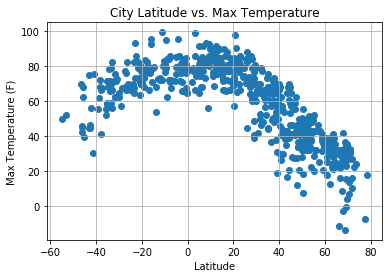

In [58]:
plt.scatter(weather_data_frame["lat"], weather_data_frame["max temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

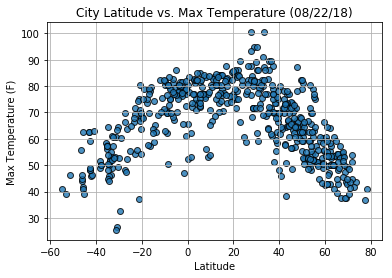

#### Latitude vs. Humidity Plot

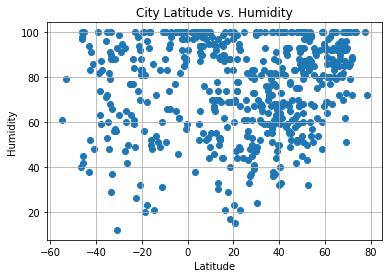

In [50]:
plt.scatter(weather_data_frame["lat"], weather_data_frame["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Max Humidity.png")

# Show plot
plt.show()

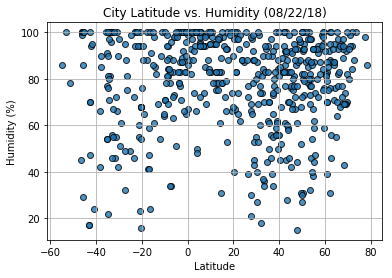

#### Latitude vs. Cloudiness Plot

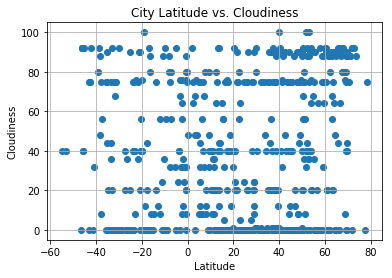

In [51]:
plt.scatter(weather_data_frame["lat"], weather_data_frame["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

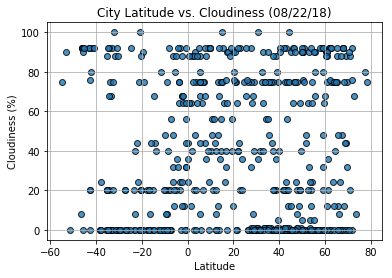

In [8]:
plt.scatter(weather_data_frame["lat"], weather_data_frame["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

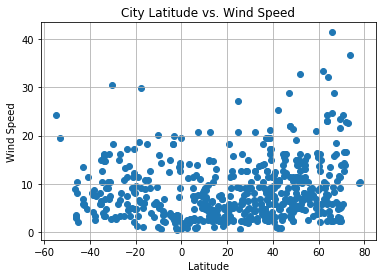

In [53]:
plt.scatter(weather_data_frame["lat"], weather_data_frame["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

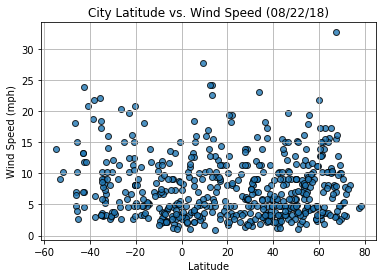

In [9]:
plt.scatter(weather_data["lat"], weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Wind Speed.png")

# Show plot
plt.show()